## 1. Persiapan Awal

### Mengimpor Library
Library-library ini mencakup:
-   `pandas` untuk manipulasi dan analisis data tabular (DataFrame).
-   `numpy` untuk operasi numerik, terutama array.
-   `matplotlib.pyplot` dan `seaborn` untuk visualisasi data.
-   `ast` (Abstract Syntax Tree) untuk membantu parsing string yang sebenarnya adalah struktur data Python (seperti list atau dictionary) pada kolom dataset.
-   `sklearn.feature_extraction.text.TfidfVectorizer` untuk mengubah data teks menjadi vektor fitur numerik menggunakan TF-IDF.
-   `sklearn.metrics.pairwise.cosine_similarity` untuk menghitung kemiripan kosinus antar vektor film.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### 1.2 Memuat Dataset


1.  `tmdb_5000_movies.csv`: Berisi informasi umum tentang film seperti anggaran, genre, ID, kata kunci, bahasa asli, judul asli, ringkasan (overview), popularitas, perusahaan produksi, negara produksi, tanggal rilis, pendapatan, durasi, bahasa yang digunakan, status, tagline, judul, rata-rata vote, dan jumlah vote.
2.  `tmdb_5000_credits.csv`: Berisi informasi kredit film seperti ID film, judul, daftar pemeran (cast), dan daftar kru (crew).



In [5]:
movies_df = pd.read_csv('tmdb_5000_movies.csv')
print("Dataset 'tmdb_5000_movies.csv' berhasil dimuat.")
movies_df.head()

Dataset 'tmdb_5000_movies.csv' berhasil dimuat.


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
print("--- movies_df.info() ---")
movies_df.info()


print("\n\n--- movies_df.describe() ---")
movies_df.describe()

--- movies_df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


**Hasil Observasi:**
-   Dataset `movies_df` terdiri dari **4803 baris dan 20 kolom**.
-   Terdapat campuran tipe data: 7 kolom numerik (`int64`, `float64`) dan 13 kolom `object` (umumnya string). Beberapa kolom `object` seperti `genres`, `keywords`, dan `production_companies` tampak berisi data terstruktur (kemungkinan JSON) yang memerlukan parsing.
-   **Missing Values Ditemukan**:
    -   `homepage`: Banyak nilai hilang (3091).
    -   `tagline`: Cukup banyak nilai hilang (844).
    -   `overview`: Sedikit nilai hilang (3).
    -   `release_date`: Sangat sedikit nilai hilang (1).
    -   `runtime`: Sangat sedikit nilai hilang (2).
    -   Kolom lainnya tidak memiliki nilai hilang.
-    `describe()` untuk kolom numerik:
    -   Kolom seperti `budget`, `popularity`, `revenue`, dan `vote_count` menunjukkan distribusi yang miring ke kanan (right-skewed), di mana nilai rata-rata (mean) lebih besar dari median (nilai tengah). Ini mengindikasikan adanya beberapa film dengan nilai yang sangat tinggi pada fitur-fitur tersebut.
    -   Teridentifikasi adanya nilai 0 pada kolom `budget`, `revenue`, dan `runtime`, yang mungkin memerlukan investigasi lebih lanjut.
    -   `vote_average` memiliki rentang nilai dari 0 hingga 10, dengan rata-rata sekitar 6.09.

In [7]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')


print("Dataset 'tmdb_5000_credits.csv' berhasil dimuat.")
credits_df.head()

Dataset 'tmdb_5000_credits.csv' berhasil dimuat.


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:

print("--- credits_df.info() ---")
credits_df.info()


print("\n\n--- credits_df.describe() ---")
credits_df.describe()

--- credits_df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


--- credits_df.describe() ---


,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


**Hasil Observasi:**
-   Dataset `credits_df` terdiri dari **4803 baris dan 4 kolom**: `movie_id` (int64), `title` (object), `cast` (object), dan `crew` (object).
-   **Tidak ditemukan adanya nilai yang hilang (missing values)** pada setiap kolom dalam dataset `credits_df`. Ini menunjukkan kelengkapan data yang baik untuk informasi kredit film.
-   Kolom `movie_id` bertipe numerik (`int64`) dan akan berfungsi sebagai kunci utama untuk menggabungkan `credits_df` dengan `movies_df`. Statistik deskriptifnya menunjukkan rentang ID film.
-   Kolom `title` (judul film), `cast` (daftar pemain), dan `crew` (daftar kru) semuanya bertipe `object` (kemungkinan besar string). Kolom `cast` dan `crew` diduga kuat berisi data terstruktur dalam format JSON-like yang akan memerlukan proses parsing lebih lanjut untuk mengekstrak informasi spesifik (seperti nama aktor atau sutradara).

###  Menggabungkan DataFrame `movies_df` dan `credits_df`
Setelah kedua dataset dimuat dan diinspeksi secara individual, langkah selanjutnya adalah menggabungkannya menjadi satu DataFrame komprehensif. Penggabungan akan dilakukan berdasarkan ID unik film.

Kolom `id` pada `movies_df` dan kolom `movie_id` pada `credits_df` akan digunakan sebagai kunci penggabungan. Untuk konsistensi, kolom `movie_id` akan diubah namanya menjadi `id` terlebih dahulu.

Karena kolom `title` ada di kedua DataFrame, saya akan menangani potensi duplikasi kolom ini setelah proses merge.

In [11]:
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)


merged_df = pd.merge(movies_df, credits_df, on='id')


if 'title_x' in merged_df.columns and 'title_y' in merged_df.columns:
    print("Kolom 'title' duplikat ('title_x', 'title_y') terdeteksi.")
    merged_df.rename(columns={'title_x': 'title'}, inplace=True)
    merged_df.drop('title_y', axis=1, inplace=True)
    print("Kolom 'title_y' telah dihapus dan 'title_x' di-rename menjadi 'title'.")
elif 'title' in merged_df.columns and 'title_y' in merged_df.columns:
    print("Kolom 'title' duplikat ('title', 'title_y') terdeteksi.")
    merged_df.drop('title_y', axis=1, inplace=True)
    print("Kolom 'title_y' telah dihapus.")
else:
    print("Tidak ada duplikasi kolom 'title' yang signifikan untuk ditangani atau nama kolom 'title' sudah sesuai.")



print("\n\n--- merged_df.info() ---")
merged_df.info()

print("\n\n--- merged_df.head(2) ---")
merged_df.head(2)

Kolom 'title' duplikat ('title_x', 'title_y') terdeteksi.
Kolom 'title_y' telah dihapus dan 'title_x' di-rename menjadi 'title'.


--- merged_df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue           

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


**Hasil :**
-   Proses penggabungan `movies_df` dan `credits_df` berhasil dilakukan. DataFrame `merged_df` kini memiliki **4803 baris dan 22 kolom**.
-   Jumlah kolom sesuai dengan ekspektasi: (20 kolom dari `movies_df`) + (4 kolom dari `credits_df`) - (1 kolom `id` yang digunakan untuk merge) - (1 kolom `title_y` yang dihapus) = 22 kolom.
-   Pesan konfirmasi menunjukkan bahwa duplikasi kolom `title` ("title_x", "title_y") telah berhasil ditangani, dengan mempertahankan satu kolom `title` yang benar.
-   Tipe data dari masing-masing kolom dipertahankan dari DataFrame aslinya. Kolom-kolom penting seperti `genres`, `keywords`, `cast`, dan `crew` masih bertipe `object` dan berisi data string (kemungkinan besar format JSON-like yang akan diparsing nanti).
-   Jumlah *missing values* pada kolom-kolom dari `movies_df` (seperti `homepage`, `overview`, `tagline`, `runtime`, `release_date`) tetap sama seperti sebelum digabung, karena `credits_df` tidak memiliki *missing values* dan penggabungan dilakukan dengan `inner join` pada `id` yang lengkap.
-   Output `.head(2)` mengonfirmasi bahwa kolom-kolom dari kedua DataFrame asli (misalnya, `budget` dari `movies_df` dan `cast`, `crew` dari `credits_df`) kini berada dalam satu DataFrame `merged_df`.

**Kesimpulan:**
DataFrame `merged_df` sekarang menjadi dataset utama.

## 2. Exploratory Data Analysis (EDA) pada Data Gabungan

Sekarang kita memiliki DataFrame `merged_df` yang komprehensif. Tahap selanjutnya adalah melakukan Exploratory Data Analysis (EDA) lebih lanjut dan menangani *missing values* pada data gabungan ini.

### Penanganan Missing Values pada `merged_df`
  Memeriksa kembali jumlah *missing values* pada setiap kolom di `merged_df`. Fokus utama kita adalah pada kolom `overview`, karena ini akan menjadi salah satu input penting untuk *content-based filtering*. Missing values pada kolom teks seperti `overview` biasanya diisi dengan string kosong agar tidak menyebabkan error saat proses *vectorization*.

In [12]:
print("--- Missing Values di 'merged_df' (Sebelum Penanganan) ---")
print(merged_df.isnull().sum())

merged_df['overview'].fillna('', inplace=True)
print("\nMissing values pada kolom 'overview' telah diisi dengan string kosong.")
print("\n--- Missing Values di 'merged_df' (Setelah Penanganan 'overview') ---")

missing_values_after = merged_df.isnull().sum()
print(missing_values_after[missing_values_after > 0])

--- Missing Values di 'merged_df' (Sebelum Penanganan) ---
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

Missing values pada kolom 'overview' telah diisi dengan string kosong.

--- Missing Values di 'merged_df' (Setelah Penanganan 'overview') ---
homepage        3091
release_date       1
runtime            2
tagline          844
dtype: int64


<ipython-input-12-3e7a4f76b0ba>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['overview'].fillna('', inplace=True)


In [14]:
if 'homepage' in merged_df.columns:
    merged_df.drop('homepage', axis=1, inplace=True)
    print("Kolom 'homepage' telah di-drop.")
else:
    print("Kolom 'homepage' sudah tidak ada atau telah di-drop sebelumnya.")

if 'tagline' in merged_df.columns:
    merged_df['tagline'].fillna('', inplace=True)
    print("Missing values pada kolom 'tagline' telah diisi dengan string kosong.")
else:
    print("Kolom 'tagline' sudah tidak ada atau telah ditangani sebelumnya.")

rows_before_dropna = len(merged_df)
if 'release_date' in merged_df.columns:
    merged_df.dropna(subset=['release_date'], inplace=True)
    print(f"Baris dengan NaN pada 'release_date' telah dihapus. Jumlah baris berkurang dari {rows_before_dropna} menjadi {len(merged_df)}.")
else:
    print("Kolom 'release_date' sudah tidak ada atau tidak memiliki NaN yang perlu ditangani dengan dropna.")

rows_before_dropna = len(merged_df)
if 'runtime' in merged_df.columns:
    merged_df.dropna(subset=['runtime'], inplace=True)
    print(f"Baris dengan NaN pada 'runtime' telah dihapus. Jumlah baris berkurang dari {rows_before_dropna} menjadi {len(merged_df)}.")
else:
    print("Kolom 'runtime' sudah tidak ada atau tidak memiliki NaN yang perlu ditangani dengan dropna.")

print("\n--- Missing Values di 'merged_df' (Setelah Penanganan Lanjutan) ---")
missing_values_final = merged_df.isnull().sum()
print(missing_values_final[missing_values_final > 0])

print("\n--- merged_df.info() (Setelah Penanganan Lanjutan) ---")
merged_df.info()

Kolom 'homepage' telah di-drop.
Missing values pada kolom 'tagline' telah diisi dengan string kosong.
Baris dengan NaN pada 'release_date' telah dihapus. Jumlah baris berkurang dari 4803 menjadi 4802.
Baris dengan NaN pada 'runtime' telah dihapus. Jumlah baris berkurang dari 4802 menjadi 4800.

--- Missing Values di 'merged_df' (Setelah Penanganan Lanjutan) ---
Series([], dtype: int64)

--- merged_df.info() (Setelah Penanganan Lanjutan) ---
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4800 non-null   int64  
 1   genres                4800 non-null   object 
 2   id                    4800 non-null   int64  
 3   keywords              4800 non-null   object 
 4   original_language     4800 non-null   object 
 5   original_title        4800 non-null   object 
 6   overview              4800 non-null   ob

<ipython-input-14-bb61042ba3b7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['tagline'].fillna('', inplace=True)


### Statistik Deskriptif Kolom Numerik
Melihat statistik deskriptif untuk kolom-kolom numerik utama dalam `merged_df`. Ini termasuk `budget`, `revenue`, `runtime`, `popularity`, `vote_average`, dan `vote_count`. Perintah `.describe()` akan memberikan  gambaran seperti rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil-kuartilnya.

In [13]:
# Menampilkan statistik deskriptif untuk kolom numerik yang relevan
print("--- Statistik Deskriptif untuk Kolom Numerik di merged_df ---")
merged_df[['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']].describe()

--- Statistik Deskriptif untuk Kolom Numerik di merged_df ---


,budget,revenue,runtime,popularity,vote_average,vote_count
count,4.803000e+03,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,8.226064e+07,106.875859,21.492301,6.092172,690.217989
std,4.072239e+07,1.628571e+08,22.611935,31.816650,1.194612,1234.585891
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,0.000000e+00,94.000000,4.668070,5.600000,54.000000
50%,1.500000e+07,1.917000e+07,103.000000,12.921594,6.200000,235.000000
75%,4.000000e+07,9.291719e+07,118.000000,28.313505,6.800000,737.000000
max,3.800000e+08,2.787965e+09,338.000000,875.581305,10.000000,13752.000000


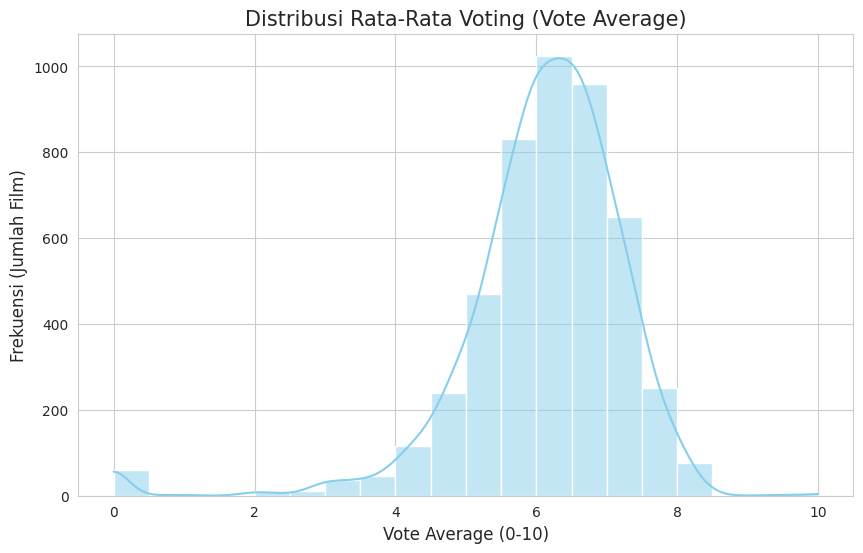

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6)) # Mengatur ukuran figure
sns.histplot(merged_df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rata-Rata Voting (Vote Average)', fontsize=15)
plt.xlabel('Vote Average (0-10)', fontsize=12)
plt.ylabel('Frekuensi (Jumlah Film)', fontsize=12)
plt.show()

## **Hasil**
- Sebagian besar film dalam dataset memiliki vote_average (rata-rata rating) antara 5.5 dan 7.5.

- Puncak distribusi (modus) berada di sekitar 6.0 hingga 6.5.

- Distribusi ini sedikit miring ke kiri (left-skewed), yang berarti ada lebih banyak film dengan rating di atas rata-rata tengah dibandingkan di bawahnya, atau dengan kata lain, ada "ekor" yang lebih panjang ke arah rating yang lebih rendah, meskipun puncaknya berada di tengah ke kanan.

#### Distribusi Skor Popularitas (`popularity`)
Selanjutnya, kita akan membuat histogram untuk melihat distribusi skor `popularity`. Fitur ini bisa memiliki rentang nilai yang sangat lebar dan seringkali distribusinya miring (skewed), di mana sebagian besar film memiliki popularitas rendah dan beberapa film memiliki popularitas sangat tinggi.

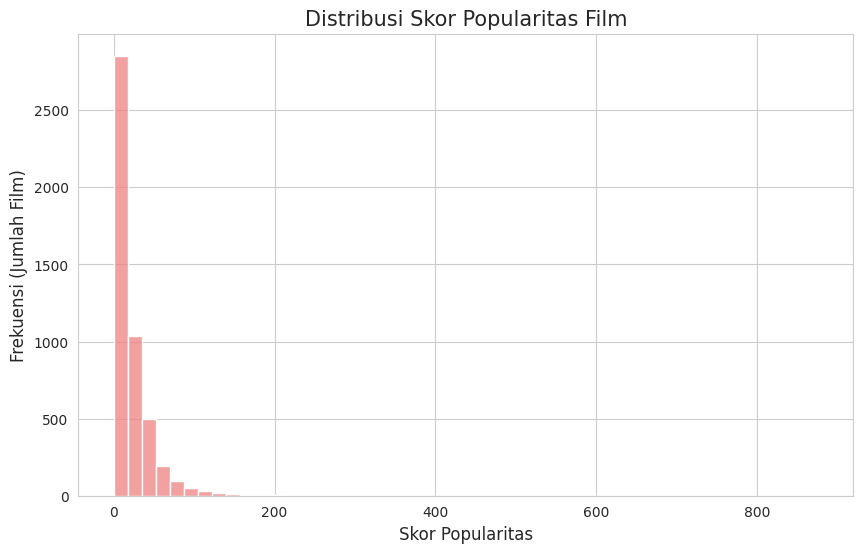


Film dengan skor popularitas tertinggi:
                       title  popularity
546                  Minions  875.581305
95              Interstellar  724.247784
788                 Deadpool  514.569956
94   Guardians of the Galaxy  481.098624
127       Mad Max: Fury Road  434.278564


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['popularity'], bins=50, kde=False, color='lightcoral')
plt.title('Distribusi Skor Popularitas Film', fontsize=15)
plt.xlabel('Skor Popularitas', fontsize=12)
plt.ylabel('Frekuensi (Jumlah Film)', fontsize=12)
plt.show()


print("\nFilm dengan skor popularitas tertinggi:")
print(merged_df.sort_values('popularity', ascending=False)[['title', 'popularity']].head())

#### Analisis dan Visualisasi Genre Film
Kolom `genres` (dan serupa seperti `keywords`, `cast`, `crew`) dalam dataset ini tidak langsung berupa list genre, melainkan string yang merepresentasikan struktur data JSON (list of dictionaries). Langkah pertama adalah mem-parsing string ini untuk mengekstrak nama-nama genre dari setiap film. Setelah itu saya dapat menghitung frekuensi kemunculan setiap genre dan memvisualisasikannya untuk melihat genre mana yang paling dominan dalam dataset.

--- Contoh Hasil Parsing Kolom Genres ---
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                      genre_list  
0  [Action, Adventure, Fantasy, Science Fiction]  
1                   [Adventure, Fantasy, Action]  
2                     [Action, Adventure, Crime]  


<ipython-input-19-b4731df1049d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(15).values, y=genre_counts.head(15).index, palette='viridis')


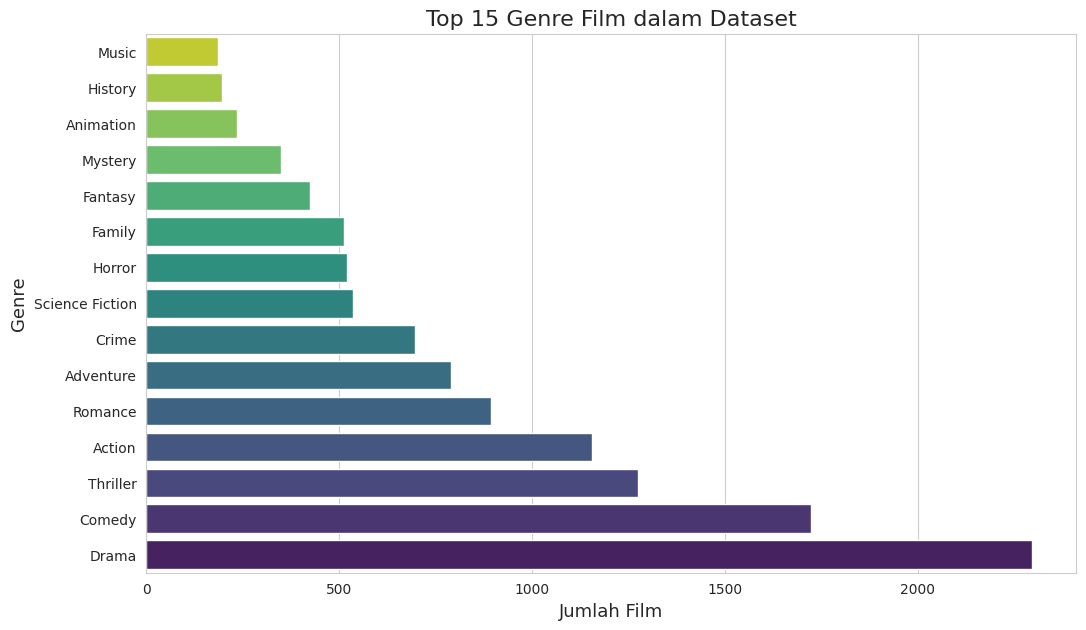


Frekuensi Genre Teratas:
Drama              2296
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Name: count, dtype: int64


In [19]:
import ast

def extract_names_from_json_like_string(json_like_string):
    if pd.isna(json_like_string) or json_like_string == '[]':
        return []
    try:

        list_of_dicts = ast.literal_eval(json_like_string)
        names = [item['name'] for item in list_of_dicts]
        return names
    except (ValueError, SyntaxError):
        return []


merged_df['genre_list'] = merged_df['genres'].apply(extract_names_from_json_like_string)

print("--- Contoh Hasil Parsing Kolom Genres ---")
print(merged_df[['title', 'genres', 'genre_list']].head(3))

all_genres = []
for index, row in merged_df.iterrows():
    all_genres.extend(row['genre_list'])


genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.head(15).values, y=genre_counts.head(15).index, palette='viridis')
plt.title('Top 15 Genre Film dalam Dataset', fontsize=16)
plt.xlabel('Jumlah Film', fontsize=13)
plt.ylabel('Genre', fontsize=13)
plt.gca().invert_yaxis()
plt.show()

print("\nFrekuensi Genre Teratas:")
print(genre_counts.head(10))

## 3. Data Preparation

Setelah melakukan eksplorasi data, tahap selanjutnya adalah persiapan data (*Data Preparation*). Tujuan utama dari tahap ini adalah untuk mengubah data mentah, khususnya fitur-fitur tekstual dan kategorikal yang masih dalam format kompleks (seperti string JSON), menjadi format yang siap digunakan oleh model machine learning kita.

Langkah-langkah utama dalam Data Preparation ini akan meliputi:
1.  **Parsing Fitur Tambahan**: Melanjutkan proses parsing untuk kolom `keywords`, `cast` (mengambil beberapa aktor utama), dan `crew` (mengambil nama sutradara), menggunakan fungsi `extract_names_from_json_like_string` yang telah kita buat sebelumnya atau fungsi serupa yang disesuaikan.
2.  **Pembersihan dan Penggabungan Fitur Teks**: Membersihkan nama-nama yang diekstrak (misalnya, menghilangkan spasi dalam satu nama agar menjadi satu token) dan menggabungkannya dengan kolom `overview` untuk membuat satu kolom teks gabungan yang komprehensif per film, yang akan kita sebut `tags`.
3.  **Pembuatan DataFrame Final untuk Modeling**: Membuat DataFrame baru yang hanya berisi kolom-kolom esensial untuk model *content-based filtering* kita, yaitu `id`, `title`, dan `tags`.

###  Parsing Fitur Tambahan (`keywords`, `cast`, `crew`)
Saya akan menggunakan fungsi `extract_names_from_json_like_string` (atau variasinya jika diperlukan) untuk mengekstrak informasi relevan dari kolom `keywords`, `cast`, dan `crew`.
-   Untuk `keywords`,   mengambil semua nama kata kunci.
-   Untuk `cast`,  mengambil beberapa nama aktor utama (misalnya, 3 aktor teratas).
-   Untuk `crew`,  fokus untuk mengambil nama sutradara (`Director`).

In [20]:
merged_df['keyword_list'] = merged_df['keywords'].apply(extract_names_from_json_like_string)


print("--- Contoh Hasil Parsing Kolom Keywords ---")
print(merged_df[['title', 'keywords', 'keyword_list']].head(2))



def extract_top_n_actors(json_like_string, n=3):
    if pd.isna(json_like_string) or json_like_string == '[]':
        return []
    try:
        cast_list = ast.literal_eval(json_like_string)
        actor_names = [member['name'] for member in cast_list[:n]]
        return actor_names
    except (ValueError, SyntaxError):
        return []

merged_df['actor_list'] = merged_df['cast'].apply(lambda x: extract_top_n_actors(x, n=3))


print("\n--- Contoh Hasil Parsing Kolom Cast (Top 3 Aktor) ---")
print(merged_df[['title', 'cast', 'actor_list']].head(2))



def extract_director_name(json_like_string):
    if pd.isna(json_like_string) or json_like_string == '[]':
        return []
    try:
        crew_list = ast.literal_eval(json_like_string)
        directors = [member['name'] for member in crew_list if member['job'] == 'Director']
        return directors
    except (ValueError, SyntaxError):
        return []

merged_df['director_list'] = merged_df['crew'].apply(extract_director_name)


print("\n--- Contoh Hasil Parsing Kolom Crew (Sutradara) ---")
two_directors_example = merged_df[merged_df['title'] == 'Four Rooms']
if not two_directors_example.empty:
    print(two_directors_example[['title', 'crew', 'director_list']])
else:
    print(merged_df[['title', 'crew', 'director_list']].head(2))

--- Contoh Hasil Parsing Kolom Keywords ---
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   

                                        keyword_list  
0  [culture clash, future, space war, space colon...  
1  [ocean, drug abuse, exotic island, east india ...  

--- Contoh Hasil Parsing Kolom Cast (Top 3 Aktor) ---
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                         actor_list  
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]  
1     

### Membersihkan dan Menggabungkan Fitur Teks menjadi Kolom `tags`
Setelah berhasil mengekstrak informasi dari kolom `keywords`, `cast`, dan `crew` menjadi list (`keyword_list`, `actor_list`, `director_list`), langkah selanjutnya adalah:
1.  **Membersihkan Elemen List**: Untuk setiap list nama (genre, keyword, aktor, sutradara), kita akan menghilangkan spasi di dalam setiap item. Contohnya, "Science Fiction" akan diubah menjadi "ScienceFiction". Ini bertujuan agar frasa tersebut dianggap sebagai satu kesatuan (token) oleh *vectorizer*.
2.  **Menggabungkan Semua Fitur Teks**: Menggabungkan `overview` (yang sudah bersih dari NaN), `genre_list` yang sudah diproses, `keyword_list` yang sudah diproses, `actor_list` yang sudah diproses, dan `director_list` yang sudah diproses menjadi satu string tunggal untuk setiap film. String gabungan ini akan disimpan dalam kolom baru bernama `tags`.
3.  **Lowercasing**: Mengubah semua teks dalam kolom `tags` menjadi huruf kecil untuk memastikan konsistensi.

In [21]:
def remove_spaces_in_list_items(item_list):
    if not isinstance(item_list, list):
        return []
    cleaned_list = []
    for item in item_list:
        if isinstance(item, str):
            cleaned_list.append(item.replace(" ", ""))
        else:
            cleaned_list.append(item)
    return cleaned_list

# Membersihkan elemen dalam list-list
merged_df['genre_list_cleaned'] = merged_df['genre_list'].apply(remove_spaces_in_list_items)
merged_df['keyword_list_cleaned'] = merged_df['keyword_list'].apply(remove_spaces_in_list_items)
merged_df['actor_list_cleaned'] = merged_df['actor_list'].apply(remove_spaces_in_list_items)
merged_df['director_list_cleaned'] = merged_df['director_list'].apply(remove_spaces_in_list_items)

# Menggabungkan semua fitur teks menjadi satu kolom 'tags'

merged_df['genres_str'] = merged_df['genre_list_cleaned'].apply(lambda x: " ".join(x))
merged_df['keywords_str'] = merged_df['keyword_list_cleaned'].apply(lambda x: " ".join(x))
merged_df['actors_str'] = merged_df['actor_list_cleaned'].apply(lambda x: " ".join(x))
merged_df['directors_str'] = merged_df['director_list_cleaned'].apply(lambda x: " ".join(x))

merged_df['tags'] = merged_df['overview'] + ' ' + \
                    merged_df['genres_str'] + ' ' + \
                    merged_df['keywords_str'] + ' ' + \
                    merged_df['actors_str'] + ' ' + \
                    merged_df['directors_str']

merged_df['tags'] = merged_df['tags'].str.lower()

print("--- Contoh Kolom 'tags' yang Sudah Dibuat (untuk film pertama) ---")
print(merged_df[['title', 'tags']].head(1).iloc[0]['tags'])

print("\n--- Beberapa Kolom Baru yang Dibuat ---")
print(merged_df[['title', 'genre_list_cleaned', 'keywords_str', 'actors_str', 'directors_str', 'tags']].head(2))

--- Contoh Kolom 'tags' yang Sudah Dibuat (untuk film pertama) ---
in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron

--- Beberapa Kolom Baru yang Dibuat ---
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                             genre_list_cleaned  \
0  [Action, Adventure, Fantasy, ScienceFiction]   
1                  [Adventure, Fantasy, Action]   

                                        keywords_str  \
0  cultureclash future spacewar spacecolony socie...   
1  ocean drugabuse exoticisl

### Membuat DataFrame Final untuk Modeling
Setelah kolom `tags` yang berisi gabungan semua fitur teks relevan berhasil dibuat, Saya akan membuat DataFrame baru yang lebih sederhana. DataFrame ini, yang akan kita sebut `final_df`, hanya akan berisi kolom-kolom esensial untuk sistem rekomendasi berbasis konten , yaitu:
-   `id`: Sebagai identifikasi unik film.
-   `title`: Judul film, untuk ditampilkan dalam hasil rekomendasi.
-   `tags`: Kolom teks gabungan yang akan diubah menjadi vektor fitur oleh TF-IDF.


In [22]:
final_df = merged_df[['id', 'title', 'tags']].copy()

print("--- DataFrame Final untuk Modeling (final_df) ---")
final_df.head()

print("\n--- final_df.info() ---")
final_df.info()

--- DataFrame Final untuk Modeling (final_df) ---

--- final_df.info() ---
<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4800 non-null   int64 
 1   title   4800 non-null   object
 2   tags    4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.0+ KB


## 4. Modeling
Pada tahap ini saya membangun model sistem rekomendasi. Sesuai dengan tujuan proyek, saya menggunakan dua pendekatan:

1.  **Content-Based Filtering**

    Pendekatan ini akan merekomendasikan film berdasarkan kemiripan kontennya. Menggunakan kolom `tags` yang telah dibuat, mengubahnya menjadi representasi vektor numerik menggunakan TF-IDF, dan kemudian menghitung kemiripan antar film menggunakan *Cosine Similarity*.
2.  **Popularity-Based Recommendation**

    Pendekatan ini akan merekomendasikan film berdasarkan popularitasnya secara umum di seluruh dataset. Ini bisa menjadi *baseline* yang baik atau berguna untuk pengguna baru.

###  Content-Based Filtering

#### 4.1.1 Vectorization menggunakan TF-IDF
Langkah pertama dalam *content-based filtering* menggunakan data teks adalah mengubah teks pada kolom `tags` menjadi representasi numerik (vektor) yang dapat diproses oleh algoritma. Kita akan menggunakan teknik **TF-IDF (Term Frequency-Inverse Document Frequency)**.

-   **Term Frequency (TF)**: Mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen (dalam kasus kita, dalam `tags` sebuah film).
-   **Inverse Document Frequency (IDF)**: Mengukur seberapa penting sebuah kata. Kata-kata yang umum muncul di banyak dokumen (misalnya, "the", "is", "a" - yang juga dikenal sebagai *stop words*) akan memiliki bobot IDF yang rendah, sedangkan kata-kata yang langka dan spesifik akan memiliki bobot IDF yang tinggi.

Dengan mengalikan TF dan IDF, kita mendapatkan skor TF-IDF untuk setiap kata dalam setiap dokumen, yang menunjukkan pentingnya kata tersebut untuk dokumen tersebut dalam konteks seluruh korpus (kumpulan semua `tags` film).
Kita akan menggunakan `TfidfVectorizer` dari `scikit-learn`.

In [23]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)
feature_vectors = tfidf_vectorizer.fit_transform(final_df['tags'])
print("Bentuk matriks fitur (jumlah film, jumlah fitur TF-IDF):")
print(feature_vectors.shape)

Bentuk matriks fitur (jumlah film, jumlah fitur TF-IDF):
(4800, 5000)


#### Menghitung Cosine Similarity
Setelah memiliki representasi vektor untuk setiap film (dari TF-IDF), kita perlu cara untuk mengukur seberapa mirip satu film dengan film lainnya. Salah satu metrik yang paling umum digunakan untuk ini dalam konteks data teks adalah **Cosine Similarity**.



In [24]:
similarity_matrix = cosine_similarity(feature_vectors)

print("Bentuk matriks kemiripan:")
print(similarity_matrix.shape)

Bentuk matriks kemiripan:
(4800, 4800)


#### Membuat Fungsi Rekomendasi
Dengan matriks kemiripan yang sudah ada, sekarang dapat membuat fungsi yang akan menerima judul film sebagai input dan mengembalikan daftar film lain yang paling mirip.

Langkah-langkah dalam fungsi ini adalah:
1.  Mencari indeks dari film yang diberikan berdasarkan judulnya di `final_df`.
2.  Mengambil baris skor kemiripan untuk film tersebut dari `similarity_matrix`. Setiap elemen dalam baris ini menunjukkan skor kemiripan film input dengan semua film lain dalam dataset.
3.  Mengurutkan skor kemiripan tersebut secara menurun.
4.  Mengambil `N` film teratas.

In [25]:
def recommend_solution1(movie_title, top_n=10):
    if movie_title not in final_df['title'].values:
        print(f"Film dengan judul '{movie_title}' tidak ditemukan dalam dataset.")
        return []

    movie_index = final_df[final_df['title'] == movie_title].index[0]

    similarity_scores = list(enumerate(similarity_matrix[movie_index]))


    sorted_similar_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    recommended_movies = []
    for i, score in sorted_similar_movies:
        if i != movie_index:
            recommended_movies.append(final_df['title'].iloc[i])
        if len(recommended_movies) >= top_n:
            break

    return recommended_movies

film_uji_1 = 'Avatar'
print(f"--- Rekomendasi untuk film '{film_uji_1}' (Top 5) ---")
rekomendasi_1 = recommend_solution1(film_uji_1, top_n=5)
if rekomendasi_1:
    for i, film in enumerate(rekomendasi_1):
        print(f"{i+1}. {film}")

film_uji_2 = 'The Dark Knight Rises'
print(f"\n--- Rekomendasi untuk film '{film_uji_2}' (Top 5) ---")
rekomendasi_2 = recommend_solution1(film_uji_2, top_n=5)
if rekomendasi_2:
    for i, film in enumerate(rekomendasi_2):
        print(f"{i+1}. {film}")

film_uji_3 = 'Toy Story'
print(f"\n--- Rekomendasi untuk film '{film_uji_3}' (Top 5) ---")
rekomendasi_3 = recommend_solution1(film_uji_3, top_n=5)
if rekomendasi_3:
    for i, film in enumerate(rekomendasi_3):
        print(f"{i+1}. {film}")
else:
    if film_uji_3 not in final_df['title'].values:
        print(f"Pastikan film '{film_uji_3}' ada di dataset dan penulisan judulnya benar.")

--- Rekomendasi untuk film 'Avatar' (Top 5) ---
1. Falcon Rising
2. Battle: Los Angeles
3. Apollo 18
4. Star Trek Into Darkness
5. Titan A.E.

--- Rekomendasi untuk film 'The Dark Knight Rises' (Top 5) ---
1. The Dark Knight
2. Batman Returns
3. Batman Begins
4. Batman Forever
5. Batman

--- Rekomendasi untuk film 'Toy Story' (Top 5) ---
1. Toy Story 3
2. Toy Story 2
3. The 40 Year Old Virgin
4. Factory Girl
5. Class of 1984


###  Popularity-Based Recommendation


Saya akan menggunakan formula **Weighted Rating (WR)** yang biasa digunakan oleh situs seperti IMDb untuk menentukan skor popularitas. Formula ini menyeimbangkan rata-rata rating dengan jumlah vote yang diterima sebuah film, sehingga film dengan rating tinggi tetapi jumlah vote sedikit tidak mendominasi.

Formula Weighted Rating (WR):
$$WR = \left(\frac{v}{v+m} \cdot R\right) + \left(\frac{m}{v+m} \cdot C\right)$$
Dimana:
-   $v$ adalah jumlah vote untuk film tersebut (kolom `vote_count`).
-   $m$ adalah jumlah vote minimum yang dibutuhkan agar film dipertimbangkan (misalnya, kita bisa menggunakan persentil ke-90 dari `vote_count` di seluruh dataset).
-   $R$ adalah rata-rata rating untuk film tersebut (kolom `vote_average`).
-   $C$ adalah rata-rata `vote_average` dari keseluruhan dataset.

Langkah-langkahnya adalah:
1.  Hitung nilai $C$ (rata-rata `vote_average` global).
2.  Tentukan nilai $m$ (batas minimum `vote_count`).
3.  Filter film yang memenuhi syarat $m$.
4.  Hitung skor WR untuk setiap film yang lolos filter.
5.  Urutkan film berdasarkan skor WR tertinggi.

In [26]:
C = merged_df['vote_average'].mean()

m = merged_df['vote_count'].quantile(0.90)

print(f"Nilai C (rata-rata global 'vote_average'): {C:.2f}")
print(f"Nilai m (batas minimum 'vote_count' - persentil ke-90): {m:.0f} votes")

popular_movies_df = merged_df.copy()

popular_movies_df = popular_movies_df[popular_movies_df['vote_count'] >= m]

print(f"\nJumlah film yang memenuhi syarat m (>= {m:.0f} votes): {popular_movies_df.shape[0]} film")

def calculate_weighted_rating(df_row, m_val=m, C_val=C):
    v = df_row['vote_count']
    R = df_row['vote_average']
    return (v / (v + m_val) * R) + (m_val / (v + m_val) * C_val)

popular_movies_df['weighted_score'] = popular_movies_df.apply(calculate_weighted_rating, axis=1)

popular_movies_df = popular_movies_df.sort_values('weighted_score', ascending=False)

print("\n--- Contoh Film Teratas Berdasarkan Weighted Score ---")
print(popular_movies_df[['title', 'vote_count', 'vote_average', 'weighted_score']].head())

Nilai C (rata-rata global 'vote_average'): 6.09
Nilai m (batas minimum 'vote_count' - persentil ke-90): 1841 votes

Jumlah film yang memenuhi syarat m (>= 1841 votes): 480 film

--- Contoh Film Teratas Berdasarkan Weighted Score ---
                         title  vote_count  vote_average  weighted_score
1881  The Shawshank Redemption        8205           8.5        8.059148
662                 Fight Club        9413           8.3        7.939187
65             The Dark Knight       12002           8.2        7.919968
3232              Pulp Fiction        8428           8.3        7.904579
96                   Inception       13752           8.1        7.863203


####  Fungsi Rekomendasi Popularity
Setelah menghitung `weighted_score` dan mengurutkan film dalam `popular_movies_df`, dapat dibuat  fungsi sederhana yang akan mengembalikan `N` film teratas berdasarkan skor popularitas ini. Fungsi ini tidak memerlukan input film dari pengguna, karena ia memberikan rekomendasi film paling populer secara umum.

In [29]:
def recommend_solution2_popularity(top_n=10):
    recommended_movies_details = popular_movies_df[['title', 'vote_count', 'vote_average', 'weighted_score']].head(top_n)
    return recommended_movies_details

print(f"--- Top 10 Film Paling Populer Berdasarkan Weighted Score  ---")
rekomendasi_populer = recommend_solution2_popularity(top_n=10)
print(rekomendasi_populer)

print(f"\n--- Top 5 Film Paling Populer Berdasarkan Weighted Score  ---")
rekomendasi_populer_5 = recommend_solution2_popularity(top_n=5)
print(rekomendasi_populer_5)

--- Top 10 Film Paling Populer Berdasarkan Weighted Score  ---
                                              title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

      weighted_score  
1881        8.059148  

## 5. Evaluasi

Setelah membangun kedua model sistem rekomendasi, tahap selanjutnya adalah melakukan evaluasi untuk menilai seberapa baik model tersebut bekerja. Untuk sistem rekomendasi, terutama *content-based filtering* yang kita buat tanpa data *feedback* eksplisit dari pengguna.

**Analisis Kualitatif Solusi Content-Based Filtering:**

* **Contoh untuk film 'Avatar':**
    Rekomendasi yang diberikan adalah:
    1.  Falcon Rising
    2.  Battle: Los Angeles
    3.  Apollo 18
    4.  Star Trek Into Darkness
    5.  Titan A.E.
    Film-film ini mayoritas tampak relevan karena memiliki kesamaan dalam genre Science Fiction (Sci-Fi) dan Action. "Star Trek Into Darkness", "Battle: Los Angeles", "Apollo 18", dan "Titan A.E." (animasi Sci-Fi) jelas berbagi elemen tema luar angkasa, teknologi, atau pertarungan dengan entitas non-manusia yang mirip dengan 'Avatar'. "Falcon Rising" mungkin sedikit berbeda jika murni film action tanpa elemen Sci-Fi yang kuat, namun bisa jadi ada kesamaan dalam kata kunci di *overview* atau *keywords* yang terdeteksi model. Secara umum, rekomendasi ini menunjukkan kemampuan model menangkap tema dan genre utama.

* **Contoh untuk film 'The Dark Knight Rises':**
    Rekomendasi yang diberikan adalah:
    1.  The Dark Knight
    2.  Batman Returns
    3.  Batman Begins
    4.  Batman Forever
    5.  Batman
    Rekomendasi ini sangat relevan dan akurat. Semua film yang direkomendasikan adalah bagian dari franchise Batman. Ini menunjukkan model sangat efektif dalam mengidentifikasi film-film dalam satu seri atau dengan karakter utama yang sama, kemungkinan besar karena kesamaan yang kuat dalam *keywords*, *overview*, *cast*, dan *crew* (misalnya, sutradara atau penulis).

* **Contoh untuk film 'Toy Story':**
    Rekomendasi yang diberikan adalah:
    1.  Toy Story 3
    2.  Toy Story 2
    3.  The 40 Year Old Virgin
    4.  Factory Girl
    5.  Class of 1984
    Rekomendasi pertama dan kedua ("Toy Story 3" dan "Toy Story 2") sangat relevan karena merupakan sekuel langsung dari film input. Namun, tiga rekomendasi berikutnya ("The 40 Year Old Virgin", "Factory Girl", "Class of 1984") tampak sangat tidak relevan dari segi genre (animasi/keluarga vs. komedi dewasa/drama/thriller). Ini mengindikasikan adanya potensi masalah:
        * Mungkin ada kesamaan kata kunci yang tidak terduga atau menyesatkan dalam kolom `tags` antara 'Toy Story' dengan film-film tersebut.
        * Ini juga bisa menunjukkan batasan dari TF-IDF yang hanya melihat frekuensi kata tanpa memahami konteks semantik yang lebih dalam.
        * Kualitas metadata untuk 'Toy Story' atau film-film yang direkomendasikan tersebut mungkin perlu ditinjau.

* **Kelebihan yang Teramati:** Model ini mampu menangkap kemiripan yang jelas berdasarkan atribut konten film, terutama untuk film-film dalam franchise yang sama atau dengan genre dan tema yang sangat spesifik. Ia juga dapat menemukan film dengan sutradara atau aktor yang sama jika kontribusi mereka signifikan dalam `tags`.
* **Potensi Kekurangan yang Teramati:** Seperti terlihat pada contoh 'Toy Story', model bisa memberikan rekomendasi yang tidak relevan jika ada kesamaan tekstual yang dangkal atau jika metadata kurang optimal. Ada juga potensi terjadinya *filter bubble*, di mana pengguna hanya disuguhkan film-film yang sangat mirip. Kualitas rekomendasi sangat bergantung pada kelengkapan dan kualitas kolom `tags`.

**Analisis Kualitatif Popularity-Based Recommendation:**

* Film-film yang direkomendasikan dalam Top 10 adalah:
    1.  The Shawshank Redemption
    2.  Fight Club
    3.  The Dark Knight
    4.  Pulp Fiction
    5.  Inception
    6.  The Godfather
    7.  Interstellar
    8.  Forrest Gump
    9.  The Lord of the Rings: The Return of the King
    10. The Empire Strikes Back
    Daftar ini berisi film-film yang secara umum diakui memiliki kualitas sangat baik, rating tinggi, dan populer di kalangan banyak penonton (terlihat dari `vote_count` dan `vote_average` yang tinggi serta `weighted_score` yang dihasilkan).

* **Kelebihan yang Teramati:** Model ini efektif dalam menyajikan "pilihan aman" atau film-film klasik modern yang kemungkinan besar akan dihargai oleh sebagian besar pengguna. Ini sangat berguna untuk pengguna baru yang belum memiliki preferensi jelas atau ketika pengguna ingin mencari film yang sudah terbukti kualitasnya dan populer.
* **Potensi Kekurangan yang Teramati:** Rekomendasi ini bersifat generik dan tidak dipersonalisasi; semua pengguna akan mendapatkan daftar yang sama. Ini juga berarti film-film bagus yang mungkin *niche* atau kurang populer (misalnya film independen, film berbahasa asing di luar film yang sangat terkenal, atau film lama yang tidak banyak mendapat vote baru-baru ini) akan cenderung terabaikan.

**Perbandingan Singkat Kedua Solusi:**
* Content-Based menawarkan personalisasi berdasarkan konten film yang spesifik, ideal untuk pengguna yang ingin mengeksplorasi film berdasarkan kemiripan dengan apa yang sudah mereka ketahui dan sukai. Namun, kualitasnya sangat bergantung pada data tekstual dan bisa menghasilkan rekomendasi yang kurang beragam atau bahkan tidak relevan jika data kurang baik.
*Popularity-Based menawarkan rekomendasi yang lebih umum, aman, dan seringkali berkualitas tinggi secara universal, tetapi sama sekali tidak mempertimbangkan preferensi individual pengguna.
* Dalam banyak sistem rekomendasi praktis, pendekatan *hybrid* yang menggabungkan kekuatan dari berbagai metode (termasuk *collaborative filtering* jika data interaksi pengguna tersedia) seringkali memberikan hasil terbaik.


## 6. Kesimpulan

Proyek pengembangan sistem rekomendasi film menggunakan dataset TMDB 5000 Movies ini telah berhasil mengimplementasikan dua pendekatan utama: *content-based filtering* dan *popularity-based recommendation*.

**Ringkasan Proyek dan Temuan Utama:**
1.  **Data Understanding dan Preparation:** Dataset berhasil dimuat, digabungkan, dan dibersihkan dari *missing values* yang signifikan. Fitur-fitur tekstual seperti `overview`, `genres`, `keywords`, `cast`, dan `crew` telah diparsing dan diproses untuk membuat kolom `tags` yang komprehensif, yang menjadi dasar untuk model *content-based*.
2.  **Content-Based Filtering:**
    * Model ini dibangun menggunakan TF-IDF untuk mengubah `tags` menjadi vektor fitur dan *Cosine Similarity* untuk menghitung kemiripan antar film.
    * Berdasarkan analisis kualitatif, model ini mampu memberikan rekomendasi yang relevan, terutama untuk film-film dalam satu franchise atau dengan tema dan genre yang sangat mirip (contohnya, rekomendasi untuk 'The Dark Knight Rises' sangat akurat).
    * Namun, model ini juga menunjukkan potensi kelemahan, seperti memberikan rekomendasi yang kurang relevan untuk beberapa kasus (contohnya, beberapa rekomendasi untuk 'Toy Story' yang melenceng jauh dari genre aslinya), yang mungkin disebabkan oleh kesamaan kata kunci yang dangkal atau kualitas metadata.
3.  **Popularity-Based Recommendation:**
    * Model ini menggunakan formula *Weighted Rating* untuk mengurutkan film berdasarkan popularitasnya secara umum, dengan mempertimbangkan rata-rata rating dan jumlah vote.
    * Hasilnya adalah daftar film-film yang secara umum diakui berkualitas tinggi dan populer (contohnya, "The Shawshank Redemption", "The Dark Knight"), yang berguna sebagai rekomendasi umum atau untuk pengguna baru.
    * Kekurangannya adalah tidak adanya personalisasi.

**Tantangan yang Dihadapi:**
* **Parsing Data Kompleks:** Proses parsing data dari kolom yang berisi string JSON-like (seperti `genres`, `cast`, `crew`) memerlukan perhatian khusus dan fungsi helper yang tepat.
* **Kualitas Metadata:** Kualitas rekomendasi *content-based* sangat bergantung pada kelengkapan dan relevansi metadata yang digunakan. Metadata yang ambigu atau kurang deskriptif dapat menghasilkan rekomendasi yang kurang optimal.
* **Evaluasi Kuantitatif:** Ketiadaan data *ground truth* (seperti rating pengguna eksplisit untuk setiap film yang direkomendasikan) membuat evaluasi kuantitatif yang robust (menggunakan metrik seperti Precision@k atau Recall@k) menjadi sulit dilakukan dalam lingkup proyek ini.

**Potensi Pengembangan di Masa Depan:**
* **Peningkatan Fitur Teks:** Menggunakan teknik *embedding* yang lebih canggih (seperti Word2Vec, Doc2Vec, atau *transformer-based embeddings* seperti Sentence-BERT) untuk representasi fitur teks yang lebih kaya makna dan mampu menangkap nuansa semantik.
* **Hybrid Approach:** Menggabungkan model *content-based* dengan *collaborative filtering* (jika data interaksi pengguna tersedia) untuk menciptakan sistem rekomendasi *hybrid* yang lebih kuat dan dapat mengatasi kekurangan masing-masing pendekatan.
* **Evaluasi Lebih Lanjut:** Jika memungkinkan, melakukan *user studies* atau *A/B testing* untuk mendapatkan feedback langsung dari pengguna mengenai kualitas rekomendasi.
* **Menangani Serendipity dan Diversity:** Mengeksplorasi cara untuk meningkatkan keberagaman (*diversity*) dan unsur kejutan (*serendipity*) dalam rekomendasi agar pengguna tidak terjebak dalam *filter bubble*.
* **Optimasi Performa:** Untuk dataset yang lebih besar, optimasi dalam perhitungan matriks kemiripan mungkin diperlukan.
